In [1]:
 import numpy as np

## Normal Equation

 θ
 =X⊺X−1 X⊺ y

 θ
 is the value of θ that minimizes the cost function.
 • y is the vector of target values containing y(1) to y(m)

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0678388 ],
       [3.03308607]])

The pseudoinverse itself is computed using a standard matrix factorization technique
 called Singular Value Decomposition (SVD) that can decompose the training set
 matrix X into the matrix multiplication of three matrices U Σ V⊺ (see
 Σ+
 numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+U⊺. To compute
 the matrix 
, the algorithm takes Σ and sets to zero all values smaller than a tiny
 threshold value, then it replaces all the nonzero values with their inverse, and finally
 it transposes the resulting matrix. This approach is more efficient than computing the
 Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
 not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some
 features are redundant, but the pseudoinverse is always defined.

## Gradient Descent

Gradient Descent is a generic optimization algorithm capable of finding optimal solu
tions to a wide range of problems. The general idea of Gradient Descent is to tweak
 parameters iteratively in order to minimize a cost function.

### Batch Gradient Descent


To implement Gradient Descent, you need to compute the gradient of the cost func
tion with regard to each model parameter θ
 . In other words, y u need to calcula 
 how much the cost function will change if you change j
 just a little bit. This is ca ed
 a partial derivative.

Batch Gradient Descent: it uses the whole batch of training
 data at every step (actually, Full Gradient Descent would probably
 be a better name). As a result it is terribly slow on very large train
ing sets (but we will see much faster Gradient Descent algorithms
 shortly). However, Gradient Descent scales well with the number of
 features; training a Linear Regression model when there are hun
dreds of thousands of features is much faster using Gradient
 Descent than using the Normal Equation or SVD decomposition.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole
 training set to compute the gradients at every step, which makes it very slow when
 the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a
 random instance in the training set at every step and computes the gradients based
 only on that single instance. Obviously, working on a single instance at a time makes
 the algorithm much faster because it has very little data to manipulate at every itera
tion. It also makes it possible to train on huge training sets, since only one instance
 needs to be in memory at each iteration (Stochastic GD can be implemented as an
 out-of-core algorithm

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
 less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
 the minimum, the cost function will bounce up and down, decreasing only on aver
age. Over time it will end up very close to the minimum, but once it gets there it will
 continue to bounce around, never settling 4-9). So once the algo
rithm stops, the final parameter values are good, but not optimal.

#### If your cost function is very irregular, i.e. has lots of ups and downs, then Stochastic Gradient Descent is useful because it can help the algorithm jump out of the local minima

In [4]:
from sklearn.linear_model import SGDRegressor

In [5]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [6]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [7]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.02717983]), array([2.99751365]))

### Mini-batch Gradient Descent

The last Gradient Descent algorithm we will look at is called Mini-batch Gradient
 Descent. It is simple to understand once you know Batch and Stochastic Gradient
 Descent: at each step, instead of computing the gradients based on the full training set
 (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD
 computes the gradients on small random sets of instances called mini-batches. The
 main advantage of Mini-batch GD over Stochastic GD is that you can get a perfor
mance boost from hardware optimization of matrix operations, especially when using
 GPUs.

## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a
 linear model to fit nonlinear data. A simple way to do this is to add powers of each
 feature as new features, then train a linear model on this extended set of features. This
 technique is called Polynomial Regression.

In [8]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [9]:
y

array([[ 6.11404442],
       [ 2.81953853],
       [ 1.25498226],
       [ 1.20801243],
       [ 1.73176413],
       [ 1.30726862],
       [-0.34041709],
       [ 2.70191899],
       [ 2.2286036 ],
       [ 1.66111927],
       [ 1.55812545],
       [ 3.06765205],
       [ 1.85315429],
       [ 0.43008474],
       [ 3.23194924],
       [ 0.67126364],
       [ 8.11444661],
       [ 9.15580997],
       [ 0.98235651],
       [ 1.76226975],
       [ 2.80840294],
       [ 2.81593201],
       [ 1.37535448],
       [ 1.72479885],
       [ 6.88707745],
       [ 7.96226053],
       [ 2.91616929],
       [ 0.72134931],
       [ 2.49867438],
       [ 3.62853054],
       [ 1.41939238],
       [ 3.66134269],
       [ 2.99855726],
       [-0.11411522],
       [ 2.63346518],
       [ 1.89940211],
       [ 0.51522638],
       [ 5.49383219],
       [ 3.9234408 ],
       [ 2.39297649],
       [ 8.8166964 ],
       [ 3.95061713],
       [ 1.3569379 ],
       [ 1.75213365],
       [ 0.85484653],
       [ 1

In [10]:
import matplotlib.pyplot as plt

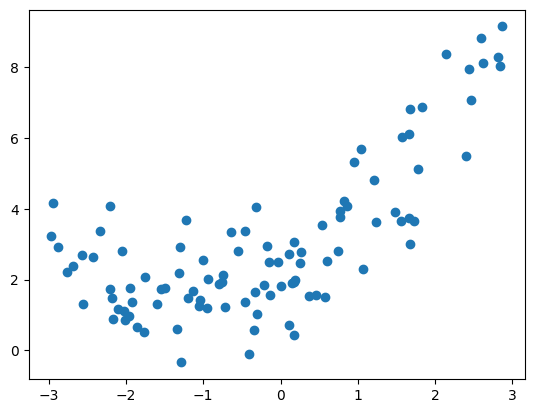

In [11]:
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
 nomialFeatures class to transform our training data, adding the square (second
degree polynomial) of each feature in the training set as a new feature (in this case
 there is just one feature):

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [13]:
X[0]

array([1.65661405])

In [14]:
X_poly[0]

array([1.65661405, 2.74437009])

X_poly now contains the original feature of X plus the square of this feature. Now you
 can fit a LinearRegression model to this extended training data

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [16]:
lin_reg.intercept_, lin_reg.coef_

(array([2.15130128]), array([[1.0464521 , 0.44696452]]))

In [17]:
y_new = lin_reg.predict(X_poly)

In [18]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0

In [19]:
X_new_poly = poly_features.transform(X_new)

In [20]:
y_new = lin_reg.predict(X_new_poly)
y_new

array([[3.03462561],
       [2.93715614],
       [2.84297016],
       [2.75206766],
       [2.66444865],
       [2.58011313],
       [2.49906109],
       [2.42129254],
       [2.34680747],
       [2.27560589],
       [2.20768779],
       [2.14305318],
       [2.08170206],
       [2.02363442],
       [1.96885027],
       [1.9173496 ],
       [1.86913242],
       [1.82419872],
       [1.78254852],
       [1.74418179],
       [1.70909856],
       [1.6772988 ],
       [1.64878254],
       [1.62354976],
       [1.60160047],
       [1.58293466],
       [1.56755234],
       [1.5554535 ],
       [1.54663815],
       [1.54110629],
       [1.53885791],
       [1.53989302],
       [1.54421161],
       [1.55181369],
       [1.56269926],
       [1.57686831],
       [1.59432084],
       [1.61505687],
       [1.63907638],
       [1.66637937],
       [1.69696585],
       [1.73083582],
       [1.76798927],
       [1.80842621],
       [1.85214663],
       [1.89915054],
       [1.94943794],
       [2.003

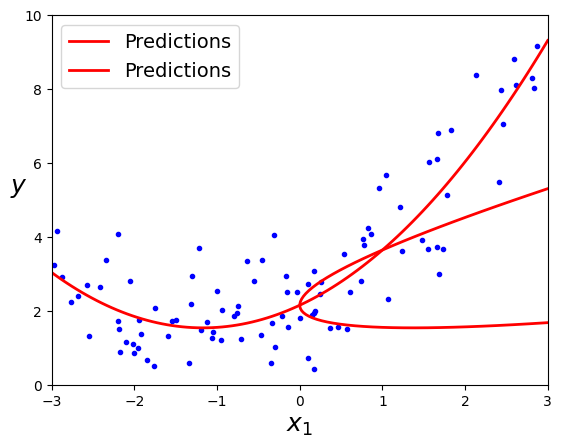

In [21]:
plt.plot(X, y, "b.")
plt.plot(X_new_poly, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

### Learning Curves

In Chapter 2 you used cross-validation to get an estimate of a model’s generalization
 performance. If a model performs well on the training data but generalizes poorly
 according to the cross-validation metrics, then your model is overfitting. If it per
forms poorly on both, then it is underfitting. This is one way to tell when a model is
 too simple or too complex.

Another way to tell is to look at the learning curves: these are plots of the model’s per
formance on the training set and the validation set as a function of the training set
 size (or the training iteration). To generate the plots, train the model several times on
 different sized subsets of the training set. The following code defines a function that,
 given some training data, plots the learning curves of a model:

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [23]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.yticks([0,3])
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    

(0.0, 80.0, 0.0, 3.0)

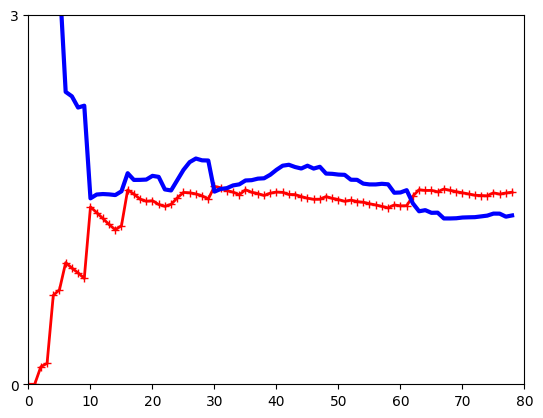

In [24]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])

These learning curves are typical of a model that’s underfitting. Both curves have
 reached a plateau; they are close and fairly high.

#### IMPORTANT NOTE
If your model is underfitting the training data, adding more train
ing examples will not help. You need to use a more complex mode 
 or come up with better features.

 Now let’s look at the learning curves of a 10th-degree polynomial model on the same
 data

In [25]:
from sklearn.pipeline import Pipeline

In [26]:
regression_pipleine_with_polynomial_feature_and_lin_reg_model = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])

(0.0, 80.0, 0.0, 3.0)

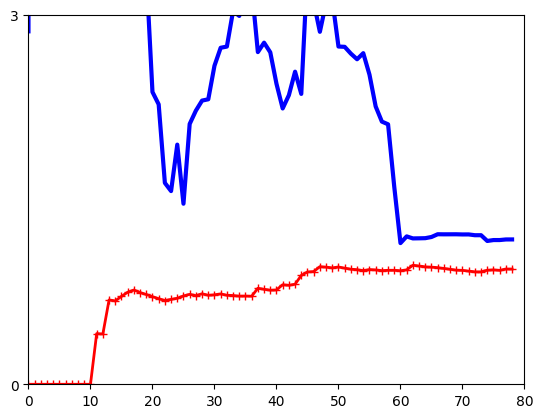

In [27]:
plot_learning_curves(regression_pipleine_with_polynomial_feature_and_lin_reg_model, X, y)
plt.axis([0, 80, 0, 3])

#### IMPORTANT NOTE
One way to improve an overfitting model is to feed it more training
 data until the validation error reaches the training error.

## The Bias/Variance Trade-of
Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance.

### Bias

This part of the generalization error is due to wrong assumptions, such as assum
ing that the data is linear when it is actually quadratic. A high-bias model is mos 
 likely to underfit the training da. This notion of bias is not to be confused with the bias term of linear models.ta
 

### Variance
This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

### Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

## Regularized Linear Models

a good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reducethe number of polynomial degrees. For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

### Ridge Regression

Ridge Regression is a regularized version of Linear Regression: a regularization term equal to α∑i = 1 n θ
 is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance. i

It is quite common for the cost function used during training to be
 different from the performance measure used for testing. Apart
 from regularization, another reason they might be different is that a
 good training cost function should have optimization-friendly
 derivatives, while the performance measure used for testing should
 be as close as possible to the final objective. For example, classifiers
 are often trained using a cost function such as the log loss (dis
cussed in a moment) but evaluated using precision/recall.

The hyperparameter α controls how much you want to regularize the model. If α = 0,
 then Ridge Regression is just Linear Regression. If α is very large, then all weights end
 up very close to zero and the result is a flat line going through the data’s mean.

Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solu
tion (a variant of Equation 4-9 that uses a matrix factorization technique by André
Louis Cholesky):

In [28]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.66133881]])

using Stochastic Gradient Descent

In [29]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.62574634])

The penalty hyperparameter sets the type of regularization term to use. Specifying
 "l2" indicates that you want SGD to add a regularization term to the cost function
 equal to half the square of the ℓ2
 norm of the weight vector: this is simply Ridge
 Regression.

### Lasso Regression (Least Absolute Shrinkage and Selection Operator Regression)

Lasso Regression) is another regularized version of Linear Regression: just like Ridge
 Regression, it adds a regularization term to the cost function, but it uses the ℓ1
 norm
 of the weight vector instead of half the square of the ℓ2
 norm

An important characteristic of Lasso Regression is that it tends to eliminate the
 weights of the least important feature(i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and
 outputs a sparse model (i.e., with few nonzero feature weights).s

In [30]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

Lasso(alpha=0.1)

In [31]:
lasso_reg.predict([[1.5]])

array([4.59588571])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
 regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
 and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
 Regression, and when r = 1, it is equivalent to Lasso Regression

So when should you use plain Linear Regression (i.e., without any regularization),
 Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
 regularization, so generally you should avoid plain Linear Regression. Ridge is a good
 default, but if you suspect that only a few features are useful, you should prefer Lasso
 or Elastic Net because they tend to reduce the useless features’ weights down to zero,
 as we have discuIn general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of
 training instances or when several features are strongly correlated.ssed.

Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio corresponds to
 the mix ratio r):

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.59896564])

### Early Stopping

A very different way to regularize iterative learning algorithms such as Gradient
 Descent is to stop training as soon as the validation error reaches a minimum. This is
 called early stoppingAs the
 epochs go by the algorithm learns, and its prediction error (RMSE) on the training
 set goes down, along with its prediction error on the validation set. After a while
 though, the validation error stops decreasing and starts to go back up. This indicates
 that the model has started to overfit the training data. With early stopping you just
 stop training as soon as the validation error reaches the minimum. It is such a simple
 and efficient regularization technique that Geoffrey Hinton called it a “beautiful free
 lunch.”. 

With Stochastic and Mini-batch Gradient Descent, the curves are
 not so smooth, and it may be hard to know whether you have
 reached the minimum or not. One solution is to stop only after the
 validation error has been above the minimum for some time (when
 you are confident that the model will not do any better), then roll
 back the model parameters to the point where the validation error
 was at a minimum.

#### basic implementation of early stopping:

In [33]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
poly_scaler = Pipeline([
 ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
 ("std_scaler", StandardScaler())
 ])

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [36]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)

In [37]:
X_val_poly_scaled = poly_scaler.transform(X_val)

In [38]:
X_train.shape

(80, 1)

In [39]:
X_train_poly_scaled.shape

(80, 90)

In [40]:
X_train[0]

array([0.00467912])

In [41]:
X_train_poly_scaled[0]

array([ 1.14347750e-01, -9.68094644e-01,  7.05092530e-02, -6.53861997e-01,
        3.31615284e-02, -5.26152422e-01,  5.55914207e-03, -4.54213705e-01,
       -1.28612460e-02, -4.07727361e-01, -2.45852517e-02, -3.74973058e-01,
       -3.18835803e-02, -3.50430033e-01, -3.63743679e-02, -3.31204645e-01,
       -3.90988631e-02, -3.15652952e-01, -4.06950704e-02, -3.02772015e-01,
       -4.15459380e-02, -2.91909313e-01, -4.18810169e-02, -2.82615966e-01,
       -4.18399341e-02, -2.74568728e-01, -4.15101689e-02, -2.67526374e-01,
       -4.09489714e-02, -2.61304011e-01, -4.01959150e-02, -2.55757115e-01,
       -3.92800484e-02, -2.50771099e-01, -3.82239675e-02, -2.46254157e-01,
       -3.70461440e-02, -2.42132162e-01, -3.57622683e-02, -2.38344901e-01,
       -3.43860348e-02, -2.34843223e-01, -3.29296118e-02, -2.31586838e-01,
       -3.14039328e-02, -2.28542592e-01, -2.98188844e-02, -2.25683102e-01,
       -2.81834372e-02, -2.22985669e-01, -2.65057410e-02, -2.20431401e-01,
       -2.47932000e-02, -

In [42]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
 penalty=None, learning_rate="constant", eta0=0.0005)

In [43]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

In [44]:
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        

C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python 3.11\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python 3.11\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Python 3.11\Lib\site-packages\skl

### Note that with warm_start=True, when the fit() method is called it continues train 
ing where it left off, instead of restarting from scratch.

## Logistic Regression

some regression algorithms can be used for classifica
tion (and vice versa). Logistic Regression (also called Logit Regression) is commonly
 used to estimate the probability that an instance belongs to a particular class (e.g.,
 what is the probability that this email is spam?). If the estimated probability is greater
 than 50%, then the model predicts that the instance belongs to that class (called the
 positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to
 the negative class, labeled “0”). This makes it a binary classifier.

The hyperparameter controlling the regularization strength of a
 Scikit-Learn LogisticRegression model is not alpha (as in other
 linear models), but its inverse: C. The higher the value of C, the less
 the model is regularized.

### Estimating Probabilities

So how does Logistic Regression work? Just like a Linear Regression model, a Logistic
 Regression model computes a weighted sum of the input features (plus a bias term),
 but instead of outputting the result directly like the Linear Regression model does, it
 outputs the logistic of this result

So how does Logistic Regression work? Just like a Linear Regression model, a Logistic
 Regression model computes a weighted sum of the input features (plus a bias term),
 but instead of outputting the result directly like the Linear Regression model does, it
 outputs the logistic of this result

### Training and Cost Function

 Now you know how a Logistic Regression model estimates probabilities and makes
 predictions. But how is it trained? The objective of training is to set the parameter
 vector θ so that the model estimates high probabilities for positive instances (y = 1)
 and low probabilities for negative instances (y = 0).

###  Decision Boundaries

Let’s try to build a classifier to detect the Iris virginica type based only on the petal
 width feature. First let’s load the data:

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

#### Logistic Regression model:

In [48]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
X = iris["data"][:, 3:] 

In [54]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [50]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
y = (iris["target"] == 2).astype(int)

In [53]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
 from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

##### Checking the prediction

In [59]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [60]:
y_proba = log_reg.predict_proba(X_new)

In [64]:
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

In [65]:
y_pred = log_reg.predict(X_new)

In [66]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

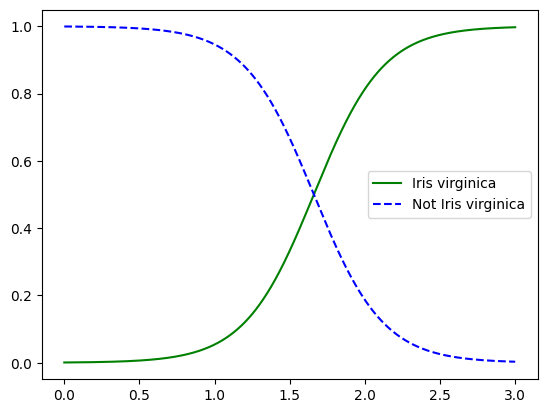

In [63]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.legend()

The petal width of Iris virginica flowers (represented by triangles) ranges from 1.4 cm
 to 2.5 cm, while the other iris flowers (represented by squares) generally have a
 smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice that there is a bit of over
lap. Above about 2 cm the classifier is highly confident that the flower is an Iris virgin
ica (it outputs a high probability for that class), while below 1 cm it is highly
 confident that it is not an Iris virginica (high probability for the “Not Iris virgi class). In between these extremes, the classifier is unsure. However, if you ask it to
 predict the class (using the predict() method rather than the predict_proba()
 method), it will return whichever class is the most likely. Therefore, there is a decision
 boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal
 width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virgin
ica, and otherwise it will predict that it is not (even if it is not very confident):nica”

##### Just like the other linear models, Logistic Regression models can be regularized
using L1 
 oL2 
 penalties. Scikit-Learn actually adds L2 2
 penalty by default.

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
 without having to train and combine multiple binary classifier This is called Softmax Regression, or Multinomial Logistic Regression.s

The idea is simple: when given an instance x, the Softmax Regression model first
 computes a score sk
 (x) for each class k, then estimates the probability of each class by
 applying the softmax function (also called the normalized exponential) to the scores.

 Once you have computed the score of every class for the instance x, you can estimate
 the probabilityp()
k
 that the instance belongs to class k by running the scores through
 the softmax function (Equation 4-20). The function computes the exponential of
 every score, then normalizes them (dividing by the sum of all the exponentials). The
 scores are generally called logits or log-odds (although they are actually unnormal
ized log-odds).

#### Warning
The Softmax Regression classifier predicts only one class at a time
 (i.e., it is multiclass, not multioutput), so it should be used only
 with mutually exclusive classes, such as different types of plants.
 You cannot use it to recognize multiple people in one picture.

Now that you know how the model estimates probabilities and makes predictions,
 let’s take a look at training. The objective is to have a model that estimates a high
 probability for the target class (and consequently a low probability for the other
 classes). Minimizing the cost function shown in Equation 4-22, called the cross
 entropy, should lead to this objective because it penalizes the model when it estimates
 a low probability for a target class. Cross entropy is frequently used to measure how
 well a set of estimated class probabilities matches the target classes.

Now you can compute the gradient vector for every class, then use Gradient Descent
 (or any other optimization algorithm) to find the parameter matrix Θ that minimizes
 the cost function.

 Let’s use Softmax Regression to classify the iris flowers into all three classes. Scikit
Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on
 more than two classes, but you can set the multi_class hyperparameter to "multino
 mial" to switch it to Softmax Regression. You must also specify a solver that supports
 Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation for
 more details). It also applies ℓ2
 regularization by default, which you can control using
 the hyperparameter C:

In [67]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [68]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)

In [69]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [70]:
softmax_reg.predict([[5, 2]])

array([2])

In [71]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])